# Datasets and Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Earthquakes  
data from https://wovodat.org/populate/convertie/Volcano_zone/main.php?data_type=hypocenter_search&volcanoes=Kilauea

In [2]:
data_earthquakes = pd.read_csv("Kilauea_earthquakes.csv")[['Date-time', 'Latitude', 'Longitude', 'Depth', 
                                                           'Magnitude', 'Earthquake-type', 'Distance']]

Depth and Magnitude columns visualisation:

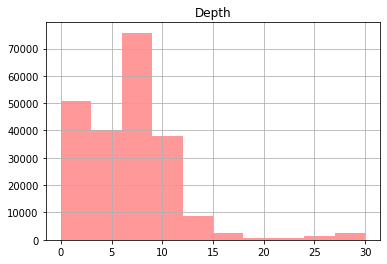

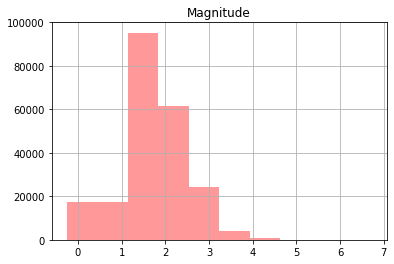

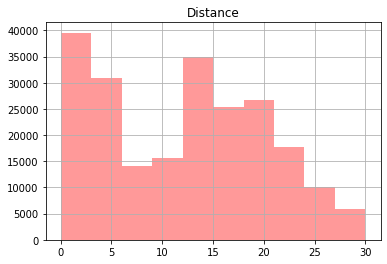

In [3]:
data_earthquakes[['Depth']].hist(alpha=0.4, color='red')
data_earthquakes[['Magnitude']].hist(alpha=0.4, color='red')
data_earthquakes[['Distance']].hist(alpha=0.4, color='red')    #in km^2
plt.show()

Unique values of column 'Earthquake-type':

In [4]:
print(data_earthquakes['Earthquake-type'].unique())

['V' 'X' 'R']


**V**: volcano tectonic earthquake - an earthquake caused by the movement of magma beneath the surface of the Earth   
**R**: remotely triggered earthquakes - a result of the effects of large earthquakes at considerable distance   
**X**: No info on earthquake type

In [5]:
data_earthquakes

,Date-time,Latitude,Longitude,Depth,Magnitude,Earthquake-type,Distance
0,1932-05-30 00:21:27.,19.3500,-155.2833,12.00,3.93,V,7.9043
1,1932-06-14 15:21:45.,19.4667,-155.3667,13.00,4.25,V,9.7803
2,1932-07-08 09:00:49.,19.3133,-155.2650,9.60,4.22,V,12.1960
3,1932-07-09 15:08:00.,19.4100,-155.2850,30.00,3.60,V,1.2410
4,1932-12-27 23:51:05.,19.3917,-155.3083,21.00,3.41,V,3.9501
...,...,...,...,...,...,...,...
220882,2017-01-19 00:03:34.51,19.3957,-155.2327,28.64,2.60,R,6.3520
220883,2017-01-25 07:26:06.36,19.3812,-155.2820,2.38,2.70,R,4.4565
220884,2017-02-01 00:39:03.44,19.3872,-155.2798,2.56,2.70,R,3.8335
220885,2017-02-01 13:18:09.15,19.3868,-155.2790,2.65,2.80,R,3.8943


## Eruptions  
data from https://volcano.si.edu/volcano.cfm?vn=332010

In [6]:
data_eruptions = pd.read_csv("eruptions.csv")
data_eruptions.head(3)

,Number,Date,Repose,Length,Flow Area,Flow Volume,Rate,Location
0,1.0,1/3/83,0.0,99 hrs,4.8,14.0,141,Fissure 1
1,2.0,2/25/83,33.0,174 hrs,2.7,14.0,80,"Pu'u 'O'o & ""1123"" vent"
2,3.0,3/28/83,23.5,290 hrs,7.9,38.0,131,Pu'u 'O'o


In [7]:
data_eruptions.tail(3)

,Number,Date,Repose,Length,Flow Area,Flow Volume,Rate,Location
46,46.0,6/2/86,24.6,10.9 hrs,-9999.0,9.8,-9999,Pu'u 'O'o
47,47.0,6/26/86,23.6,12.6 hrs,-9999.0,8.8,-9999,Pu'u 'O'o
48,48.0,7/20/86,24.0,3960 hrs,41.0,500.0,-9999,Kupaianaha


Only the rows between the 1983 and 1987 are kept, to match eruption data.

In [8]:
first_index = data_earthquakes[data_earthquakes['Date-time'].str[:4] == '1983'].index[0]
last_index = data_earthquakes[data_earthquakes['Date-time'].str[:4] == '1987'].index[0]

data_earthquakes = data_earthquakes[first_index:last_index]
data_earthquakes = data_earthquakes.reset_index(drop=True)

data_earthquakes.head(3)

,Date-time,Latitude,Longitude,Depth,Magnitude,Earthquake-type,Distance
0,1983-01-01 00:18:50.63,19.3052,-155.2292,6.11,1.92,R,14.2327
1,1983-01-01 00:18:50.63,19.3052,-155.2292,6.11,1.92,X,14.2327
2,1983-01-01 00:43:32.52,19.3628,-155.1700,3.05,2.14,X,13.8738


In [9]:
data_earthquakes.tail(3)

,Date-time,Latitude,Longitude,Depth,Magnitude,Earthquake-type,Distance
17483,1986-12-30 15:21:50.93,19.3442,-155.1078,0.03,1.85,X,20.6460
17484,1986-12-30 21:57:33.46,19.3553,-155.0978,5.45,1.84,X,21.1472
17485,1986-12-30 21:57:33.46,19.3553,-155.0978,5.45,1.84,R,21.1472


     
Change date format in eruptions table.

In [10]:
# function that changes mm/dd/yy format to yyyy-mm-dd format
def change_date_format(date):
    (m, d, y) = date.split('/')
    if int(m) < 10: m = '0' + m
    if int(d) < 10: d = '0' + d
    y = '19' + y
    return y + '-' + m + '-' + d

eruptions_dates = []

for date in data_eruptions['Date']:
    eruptions_dates.append(change_date_format(date))  

data_eruptions['Date'] = eruptions_dates

data_eruptions.head(2)

,Number,Date,Repose,Length,Flow Area,Flow Volume,Rate,Location
0,1.0,1983-01-03,0.0,99 hrs,4.8,14.0,141,Fissure 1
1,2.0,1983-02-25,33.0,174 hrs,2.7,14.0,80,"Pu'u 'O'o & ""1123"" vent"


In [11]:
from datetime import datetime
from datetime import timedelta

# is date within time frame, time frame is given with start date and duration in hours
def is_during(date, start_date, duration):
    
    date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f')
    
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = start_date + timedelta(hours = float(duration[:-4]))

    if start_date <= date <= end_date:
        return True
    else:
        return False

# is date2 tomorrow from date1
def is_tomorrow(date1, date2):
    
    date1 = datetime.strptime(date1, '%Y-%m-%d %H:%M:%S.%f')
    date2 = datetime.strptime(date2, '%Y-%m-%d')
    
    diff = date2 - date1
    # diffrence in hours
    h = diff.total_seconds() / 3600
    
    if 0 <= h <= 24:
        return True
    else:
        return False

# is date2 next week from date1
def is_next_week(date1, date2):
    
    date1 = datetime.strptime(date1, '%Y-%m-%d %H:%M:%S.%f')
    date2 = datetime.strptime(date2, '%Y-%m-%d')
    
    diff = date2 - date1
    # diffrence in hours
    h = diff.total_seconds() / 3600
    
    if 0 <= h <= 24*7:
        return True
    else:
        return False

# number of days from date1 to date2
def days(date1, date2):
    date1 = datetime.strptime(date1, '%Y-%m-%d %H:%M:%S.%f')
    date2 = datetime.strptime(date2, '%Y-%m-%d')
    
    diff = date2 - date1
    # diffrence in hours
    h = diff.total_seconds() / 3600
    # return diffrence in days if it's not negative
    if h < 0:
        return 10000
    else:
        return h / 24


Add colums to data_eruptions: is eruption in progress, is eruption going to hapen tommorrow and is eruption going to hapen next week.

In [12]:
is_erupting = []
is_erupting_tomorrow = []
is_erupting_next_week = []
days_till_eruption = []

for date_time_earthquakes in data_earthquakes['Date-time']:
    
    is_erupting_curr = False
    is_erupting_tomorrow_curr = False
    is_erupting_next_week_curr = False
    days_till_eruption_curr = 10000
    
    for (date_eruptions, length) in zip(data_eruptions['Date'], data_eruptions['Length']):
        
        if is_during(date_time_earthquakes, date_eruptions, length):
            is_erupting_curr = True
            
        if is_tomorrow(date_time_earthquakes, date_eruptions):
            is_erupting_tomorrow_curr = True
            
        if is_next_week(date_time_earthquakes, date_eruptions):
            is_erupting_next_week_curr = True
        
        if days(date_time_earthquakes, date_eruptions) < days_till_eruption_curr:
            days_till_eruption_curr = days(date_time_earthquakes, date_eruptions)
        
    is_erupting.append(is_erupting_curr)
    is_erupting_tomorrow.append(is_erupting_tomorrow_curr)
    is_erupting_next_week.append(is_erupting_next_week_curr)
    if is_erupting_curr:
        days_till_eruption.append(0)
    else:
        days_till_eruption.append(days_till_eruption_curr)

In [13]:
data_earthquakes['Is-erupting'] = is_erupting
data_earthquakes['Is-erupting-tomorrow'] = is_erupting_tomorrow
data_earthquakes['Is-erupting-next-week'] = is_erupting_next_week
data_earthquakes['Days-till-eruption'] = days_till_eruption

data_earthquakes.head()

,Date-time,Latitude,Longitude,Depth,Magnitude,Earthquake-type,Distance,Is-erupting,Is-erupting-tomorrow,Is-erupting-next-week,Days-till-eruption
0,1983-01-01 00:18:50.63,19.3052,-155.2292,6.11,1.92,R,14.2327,False,False,True,1.986914
1,1983-01-01 00:18:50.63,19.3052,-155.2292,6.11,1.92,X,14.2327,False,False,True,1.986914
2,1983-01-01 00:43:32.52,19.3628,-155.1700,3.05,2.14,X,13.8738,False,False,True,1.969763
3,1983-01-01 00:43:32.52,19.3628,-155.1700,3.05,2.14,R,13.8738,False,False,True,1.969763
4,1983-01-01 00:50:44.36,19.3818,-155.2425,0.98,2.23,R,6.3863,False,False,True,1.964764


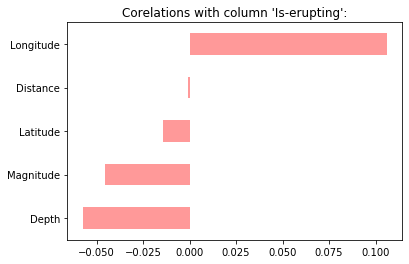

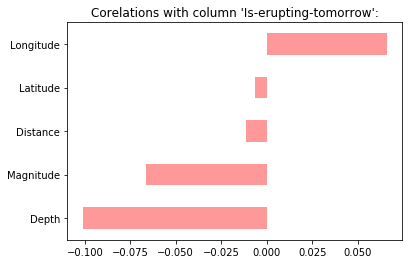

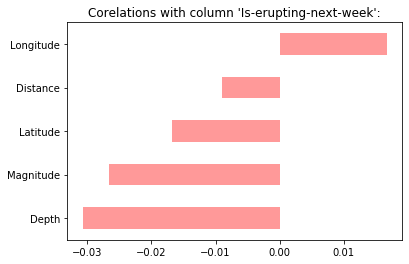

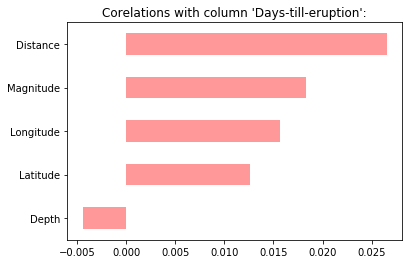

In [14]:
target_features = ['Is-erupting', 'Is-erupting-tomorrow', 'Is-erupting-next-week', 'Days-till-eruption']
features = ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Distance']

for target_feature in target_features:
    correlations = []
    
    for feature in features:
        correlation = np.corrcoef(data_earthquakes[feature], data_earthquakes[target_feature])[0, 1]
        correlations.append(correlation)

    correlations_plot = pd.Series(correlations, index=features).sort_values()
    correlations_plot.plot(kind = 'barh', color = 'red', alpha = 0.4)
    plt.title(f'Corelations with column \'{target_feature}\':')
    plt.yticks(np.arange(5), correlations_plot.index)
    plt.show()

Saving data for binary classification

In [15]:
data_earthquakes_binary = data_earthquakes[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Distance', 'Is-erupting', 
                                            'Is-erupting-tomorrow', 'Is-erupting-next-week']]
data_earthquakes_binary.to_csv('data_for_classification.csv')

In [16]:
data_earthquakes_continuous = data_earthquakes[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Distance', 
                                            'Days-till-eruption']]
data_earthquakes_continuous.to_csv('data_for_regression.csv')